<a href="https://colab.research.google.com/github/srija2771/pytorch5/blob/main/srija/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pytorch workFlow**

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu121'

**Data processing and loading**

In [2]:
weight=0.7
bias=0.3
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(x),len(y)

(50, 50)

**Splitting data into training and testing sets**

In [4]:
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [5]:
x_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

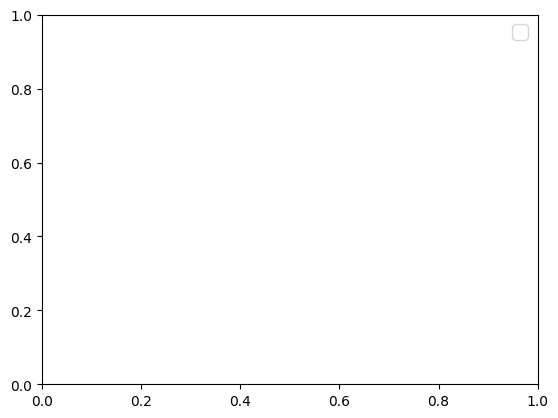

In [6]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Training data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
plt.legend(prop={"size":14});

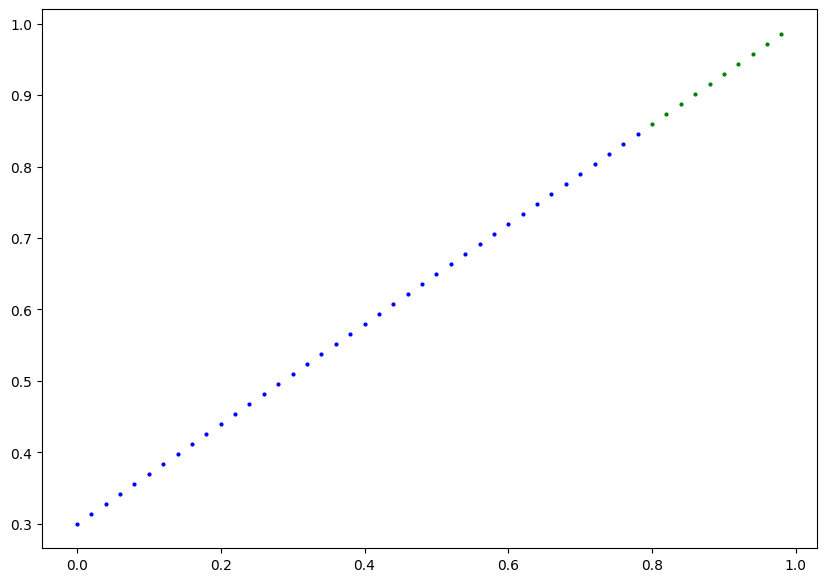

In [7]:
plot_predictions();

**Build model**

In [8]:
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias

In [9]:
torch.randn(1)

tensor([0.4386])

**Pytorch model building essentials**

**Checking the contents of our pytorch model**

In [10]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight,bias

(0.7, 0.3)

**Making predictions using torch.inference_model()**

In [13]:
y_preds=model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [14]:
x_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [15]:
with torch.inference_mode():
  y_preds=model_0(x_test)
with torch.no_grad():
  y_preds=model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [16]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

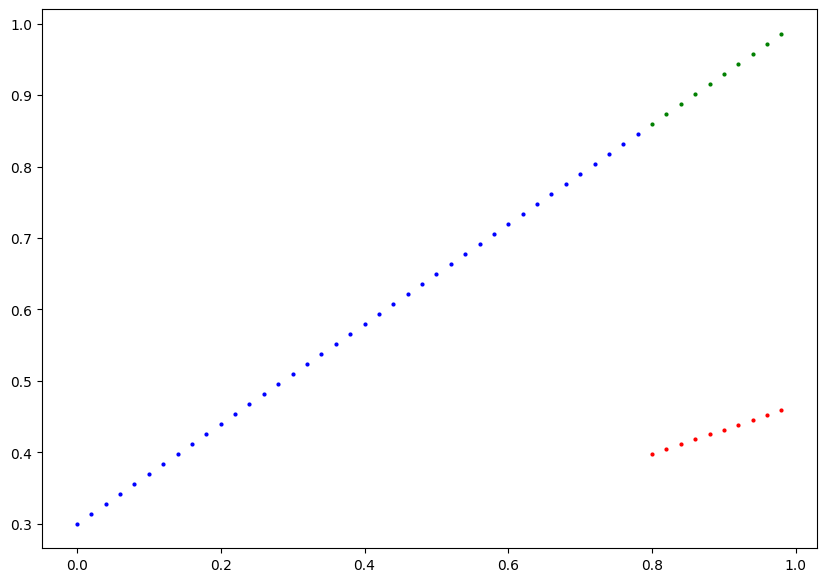

In [17]:
plot_predictions(predictions=y_preds)

**Train model**

In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [21]:
loss_fn

L1Loss()

**Building a training loop in pytorch**

In [22]:
with torch.no_grad():
  list(model_0.parameters())

In [23]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
torch.manual_seed(42)
epochs=200
epoch_count=[]
loss_values=[]
test_loss_values=[]
##training
for epoch in range(epochs):
  #set the model to training mode
  model_0.train()#train mode in pytorch sets all parameters that require gradients to require gradients
  #1.forward pass
  y_pred=model_0(x_train)
  #2.calculate the loss
  loss=loss_fn(y_pred,y_train)
  print(f"Loss:{loss}")
  #3.optimizer zero grad
  optimizer.zero_grad()
  #4.perform backwardpropogation on the loss with respect to the parameters of the model(calculate the gradients of each parameter)
  loss.backward()
  #5.step the optimizer(perform )
  optimizer.step()
  ##testing
  model_0.eval()#turns off different setting in the model not needed for evalution/testing
  with torch.inference_mode():
    #with torch.no_grad():
    #1.do the forward pass
    test_pred=model_0(x_test)
    #2.calculate the loss
    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    #print out model state_dict()
    print(f"Epoch:{epoch}|Loss:{loss}|Test loss:{test_loss}")
    print(model_0.state_dict())

Loss:0.31288138031959534
Epoch:0|Loss:0.31288138031959534|Test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss:0.3013603389263153
Loss:0.28983935713768005
Loss:0.2783183455467224
Loss:0.26679736375808716
Loss:0.2552763521671295
Loss:0.24375534057617188
Loss:0.23223432898521423
Loss:0.22071333229541779
Loss:0.20919232070446014
Loss:0.1976713240146637
Epoch:10|Loss:0.1976713240146637|Test loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss:0.18615034222602844
Loss:0.1746293306350708
Loss:0.16310831904411316
Loss:0.1515873372554779
Loss:0.14006635546684265
Loss:0.1285453587770462
Loss:0.11702437698841095
Loss:0.1060912236571312
Loss:0.09681284427642822
Loss:0.08908725529909134
Epoch:20|Loss:0.08908725529909134|Test loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss:0.08227583020925522
Loss:0.07638873159885406
Loss:0.07160007208585739


In [25]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()),test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

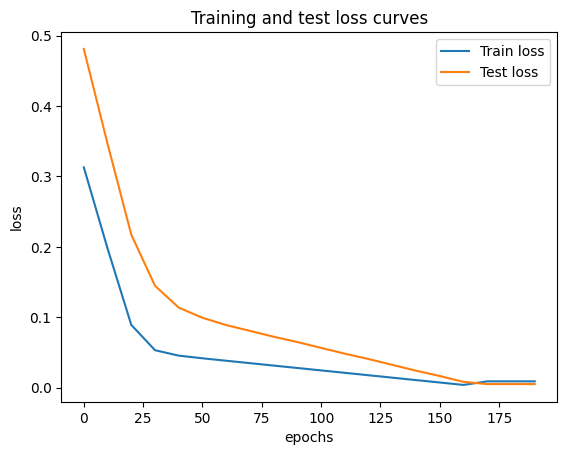

In [26]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();

In [27]:
with torch.inference_mode():
  y_preds_new=model_0(x_test)

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
weight,bias

(0.7, 0.3)

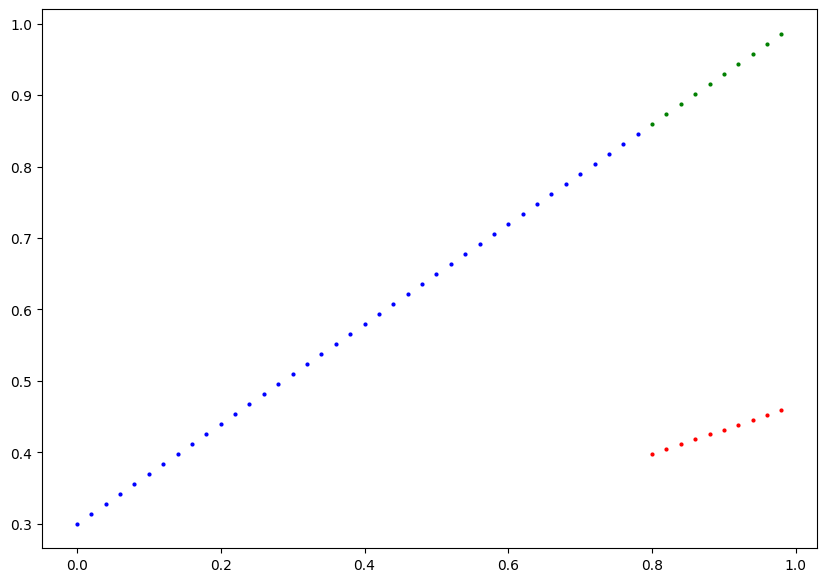

In [30]:
plot_predictions(predictions=y_preds);

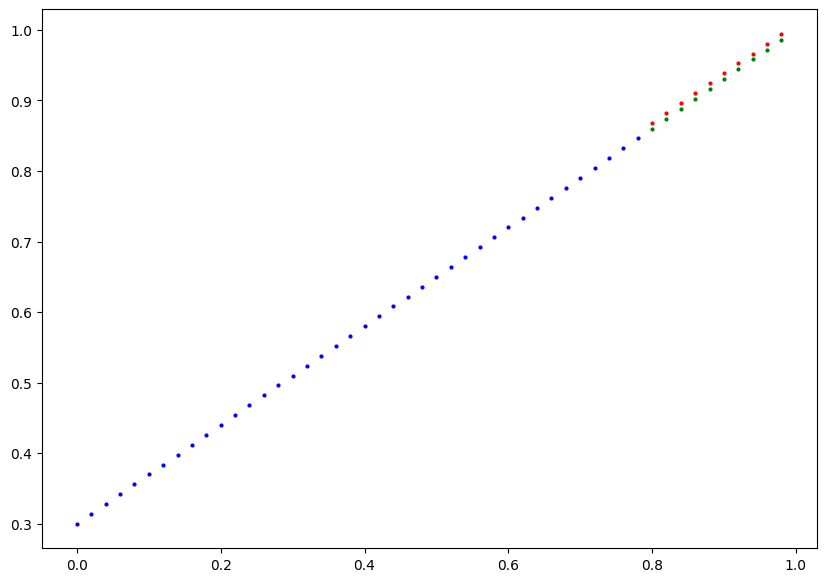

In [31]:
plot_predictions(predictions=y_preds_new);

**Saving a model in pytorch**

In [32]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [33]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model_0.pth


In [34]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Feb 13 12:10 01_pytorch_workflow_model_0.pth


**Loading a pytorch model ***

In [35]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [36]:
loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [37]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [38]:
#make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(x_test)
loaded_model_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [39]:
#make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(x_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [40]:
#compare loaded model preds with original model preds
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

**Putting it all together**

In [41]:
#import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#check Pytorch version
torch.__version__

'2.1.0+cu121'

create device-agnostic code

This means if we have got access to a GPU,our code will use it


if no GPU is available,the code will default to using CPU

In [43]:
#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cpu


**6.1 Data**

In [44]:
#create some data using the linear regression formula of y=weight*x+bias
weight=0.7
bias=0.3
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [45]:
#split data
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)


(40, 40, 10, 10)

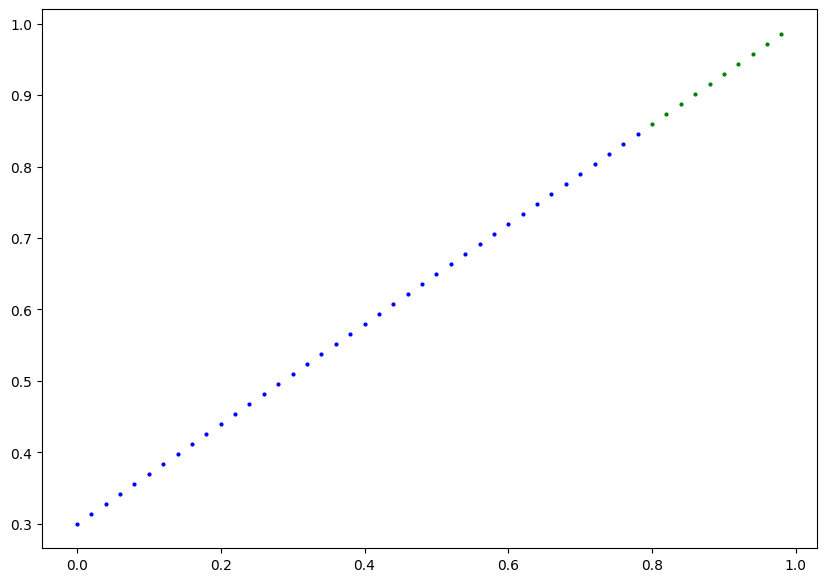

In [47]:
#plot the data
plot_predictions(x_train,y_train,x_test,y_test)

**6.2 Building a Pytorch linear model**

In [49]:
#create a linear model by subclassing nn.module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear for creating the model parameter
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)
#set the manual seed
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [48]:
x_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [51]:
#check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [52]:
#set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

**6.3 Training**

For Training we need:

Loss function

optimizer

Training Loop

Testing loop

In [53]:
#setup loss function
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)

In [57]:
torch.manual_seed(42)
epochs=200
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  y_pred=model_1(x_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(x_test)
    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    print(f"Epoch:{epoch}|Loss: {loss}|Test loss: {test_loss}")




Epoch:0|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:10|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:20|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:30|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:40|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:50|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:60|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:70|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:80|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:90|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:100|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:110|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:120|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:130|Loss: 0.0012645035749301314|Test loss: 0.013801807537674904
Epoch:140|Loss: 0.0012645035749

In [58]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [59]:
weight,bias

(0.7, 0.3)

**Making and evaluating predictions**

In [60]:
model_1.eval()
with torch.inference_mode():
  y_preds=model_1(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

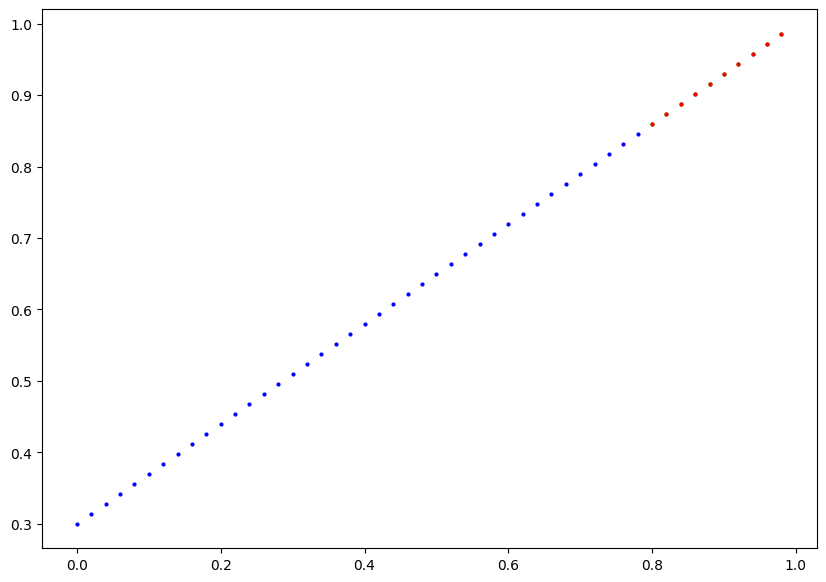

In [62]:
plot_predictions(predictions=y_preds.cpu())

**6.5 Saving and loading a trained model**

In [68]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model_1.pth


In [69]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [70]:
#load a pytorch model
#create a new instance of linear Regression model V2
loaded_model_1=LinearRegressionModelV2()
#load thesaved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
#put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [72]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [73]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [74]:
#evalute loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(x_test)
y_preds==loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])